In [1]:
import numpy as np #linear algebra 
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

from sklearn.cluster import KMeans #K-Means
from sklearn.cluster import DBSCAN #DBSCAN

from sklearn.preprocessing import StandardScaler #scaler

In [5]:
#data
df = pd.read_csv('customer_data.csv')

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


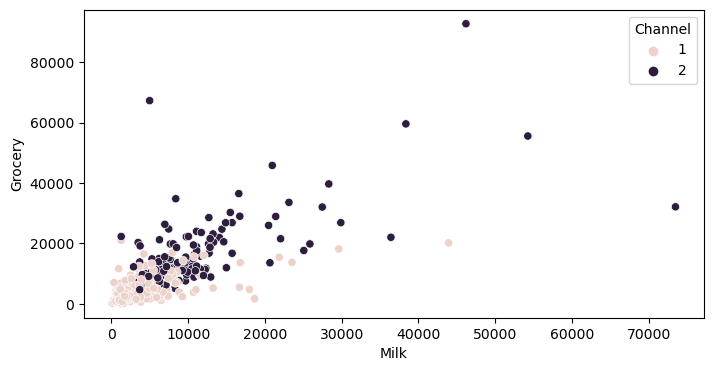

In [9]:
#EDA
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


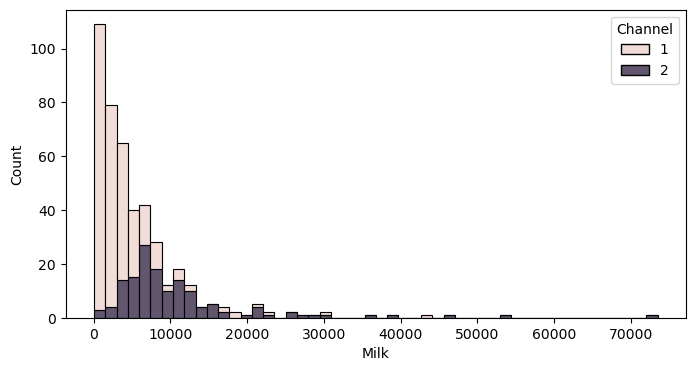

In [11]:
#EDA
plt.figure(figsize = (8,4), dpi = 100)
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")
plt.show()

Correlation Between Spending Categories


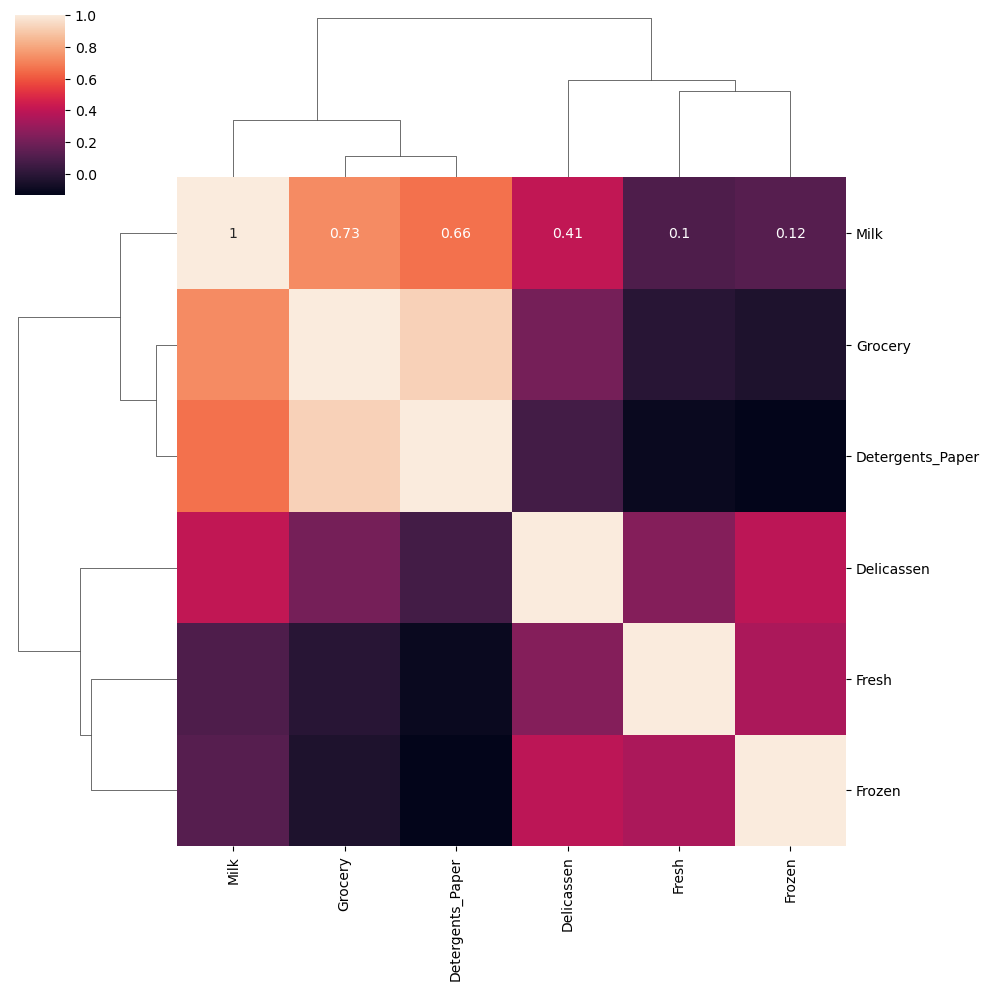

In [13]:

print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

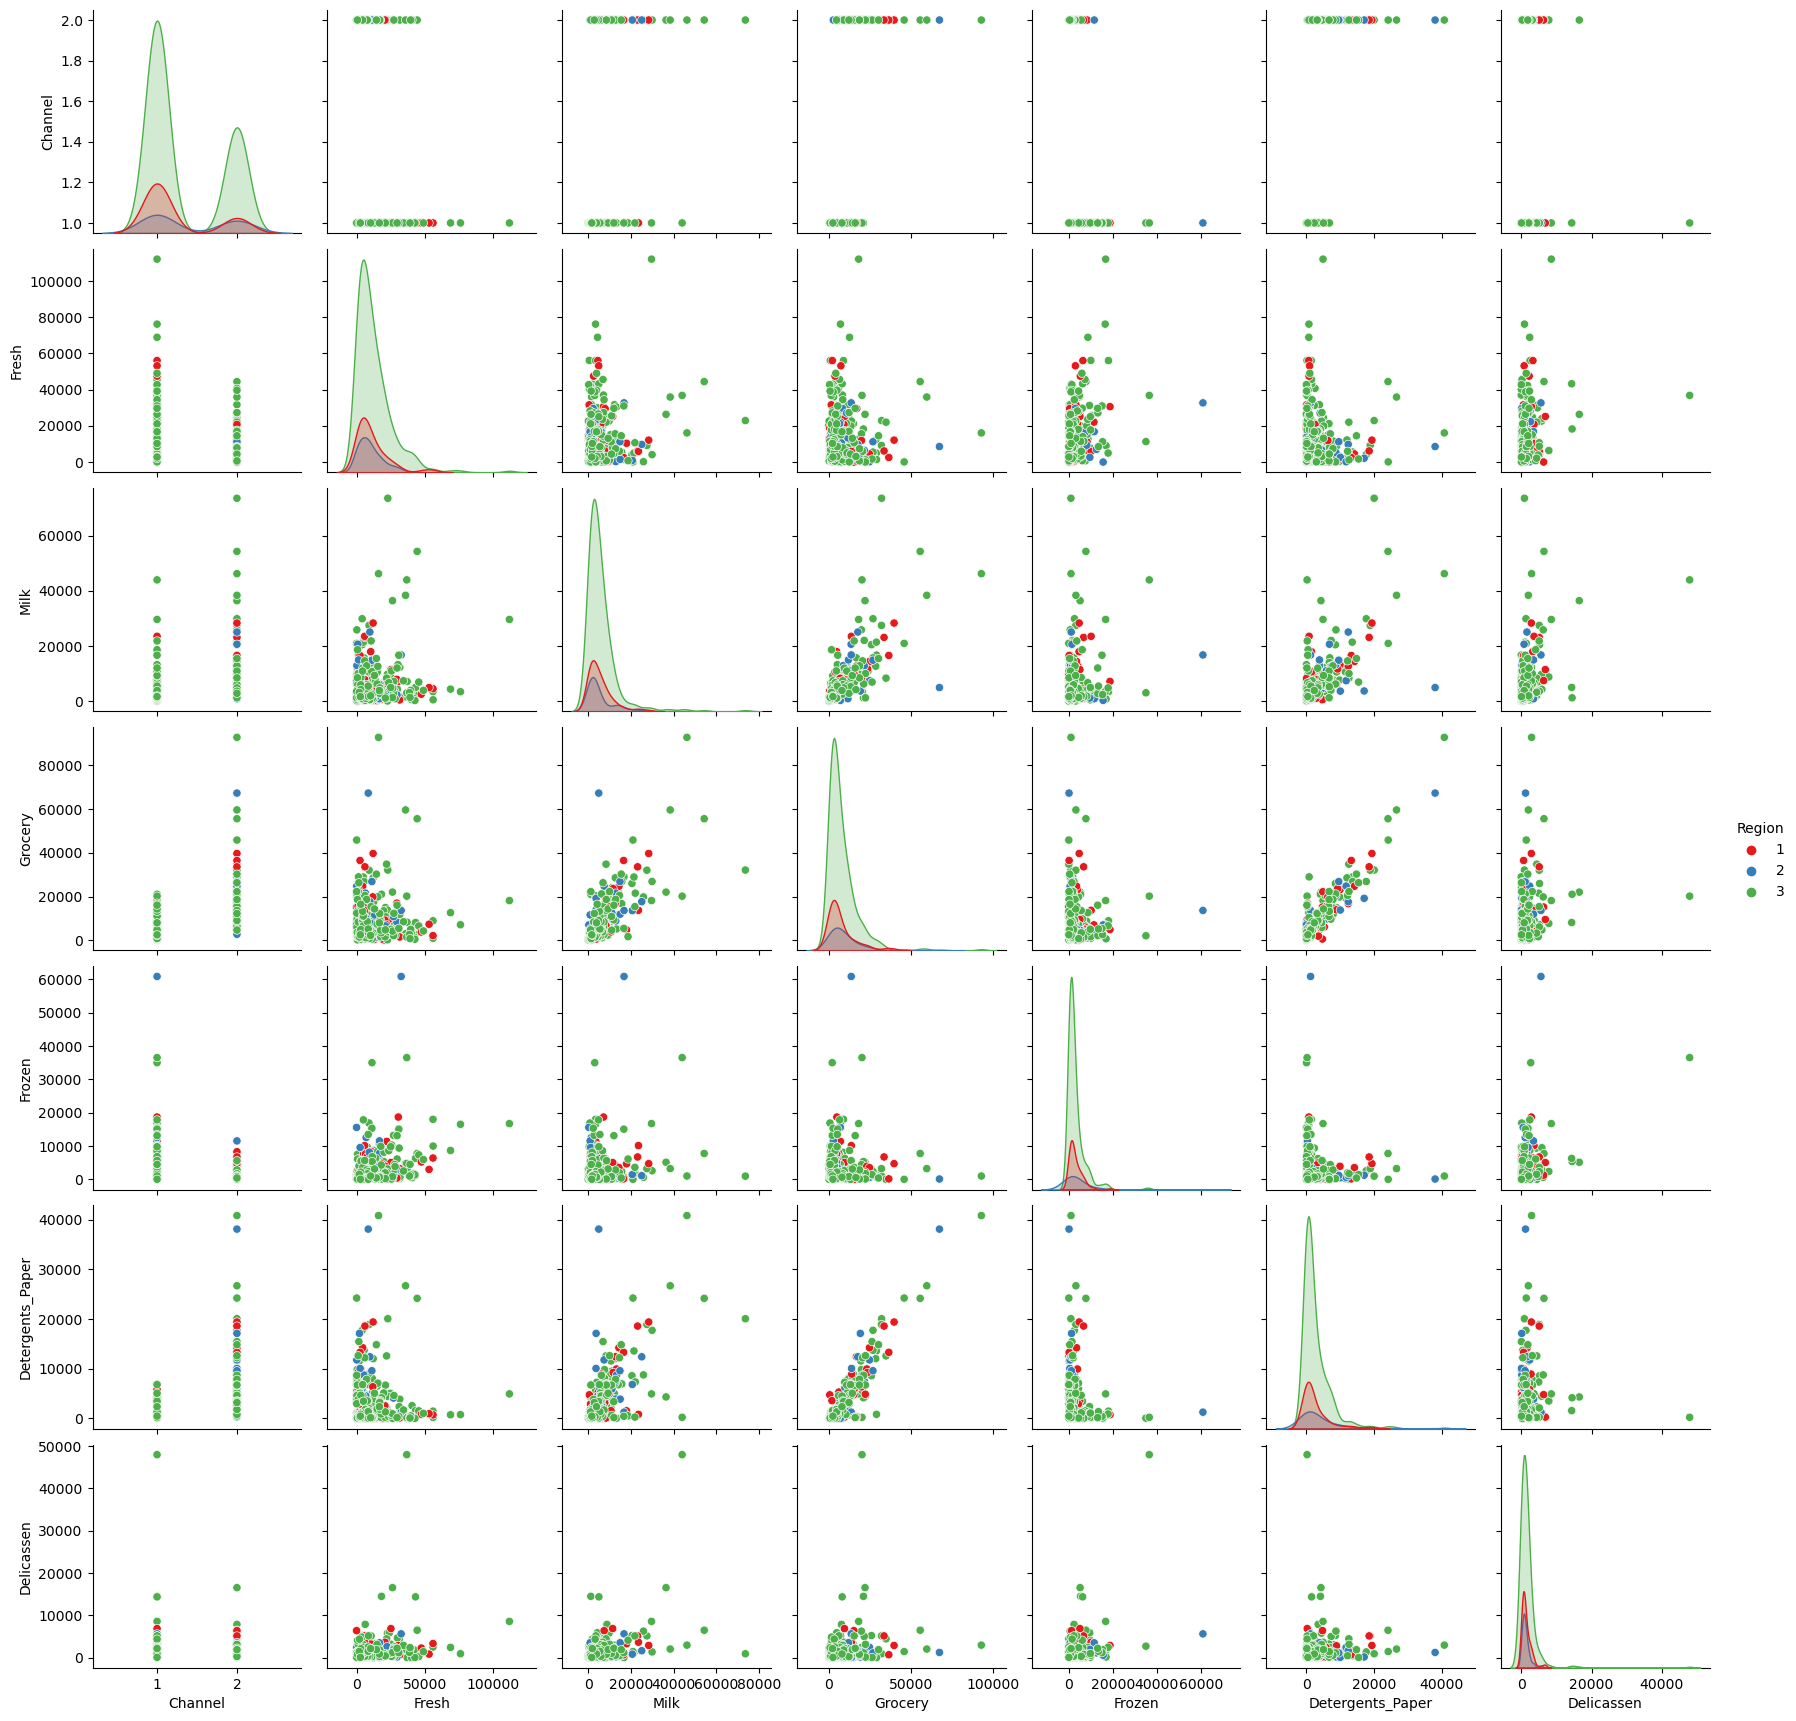

In [15]:
sns.pairplot(df,hue='Region',palette='Set1')

In [17]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [19]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


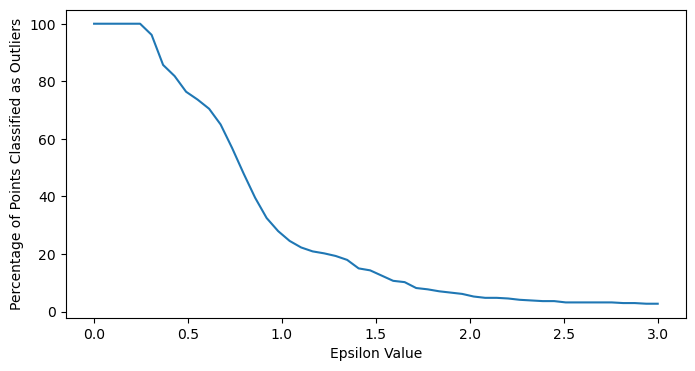

In [21]:
#a line plot of the percentage of outlier points versus the epsilon value choice.
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()

In [23]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

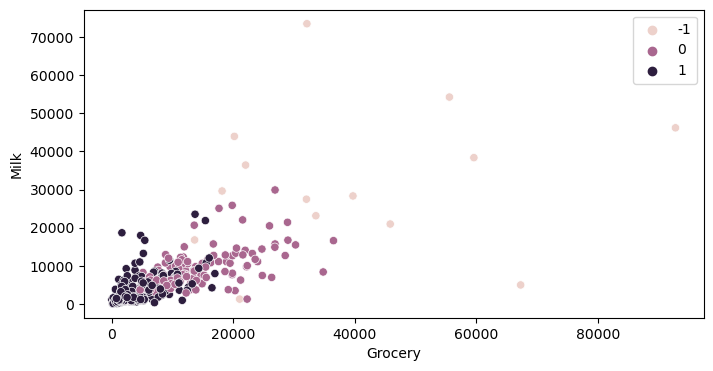

In [25]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)
plt.show()